## TASK-1: Clustering

#### Import necessary libraries


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split

#### Step 1: Load the data from the CSV file

In [ ]:
data_path = 'train_task1.csv'
df = pd.read_csv(data_path)

#### Step 2: Explore and clean the data
##### Display basic statistics and check for missing values

In [ ]:
print(df.describe())

                 T1            T2            T3            T4            T5  \
count  36752.000000  36752.000000  36752.000000  36752.000000  36752.000000   
mean     -65.865449    -64.521931    -64.574472    -65.296474    -64.462152   
std        8.737286      8.914559      8.154517      8.142803      8.068375   
min      -95.000000    -95.000000    -95.000000    -95.000000    -95.000000   
25%      -72.000000    -70.000000    -70.000000    -70.000000    -69.000000   
50%      -66.000000    -65.000000    -64.000000    -66.000000    -65.000000   
75%      -61.000000    -59.000000    -59.000000    -61.000000    -59.000000   
max      -41.000000    -37.000000    -41.000000    -39.000000    -36.000000   

                 T6            T7            T8            T9           T10  \
count  36752.000000  36752.000000  36752.000000  36752.000000  36752.000000   
mean     -63.318731    -67.030202    -66.591260    -65.692479    -65.555181   
std        8.651501      9.257529     10.160193    

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36752 entries, 0 to 36751
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   T1      36752 non-null  int64 
 1   T2      36752 non-null  int64 
 2   T3      36752 non-null  int64 
 3   T4      36752 non-null  int64 
 4   T5      36752 non-null  int64 
 5   T6      36752 non-null  int64 
 6   T7      36752 non-null  int64 
 7   T8      36752 non-null  int64 
 8   T9      36752 non-null  int64 
 9   T10     36752 non-null  int64 
 10  T11     36752 non-null  int64 
 11  T12     36752 non-null  int64 
 12  T13     36752 non-null  int64 
 13  T14     36752 non-null  int64 
 14  T15     36752 non-null  int64 
 15  T16     36752 non-null  int64 
 16  T17     36752 non-null  int64 
 17  T18     36752 non-null  int64 
 18  target  36752 non-null  object
dtypes: int64(18), object(1)
memory usage: 5.3+ MB
None


##### Check for and handle missing values if any

In [ ]:
df = df.dropna()

#### Step 4: Split the data into features and target

In [ ]:
X = df.drop('target', axis=1)
y = df['target']


#### Step 5: Feature scaling
##### Standardize the features using StandardScaler

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#### Step 6: Split the data into training and testing sets

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


#### Step 7: Determine the optimal number of clusters (K) using Elbow Method

##### Choose the number of clusters where the within-cluster sum of squares (inertia) starts to decrease at a slower rate

In [ ]:
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_train)
    inertia.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

##### Plot the Elbow Method

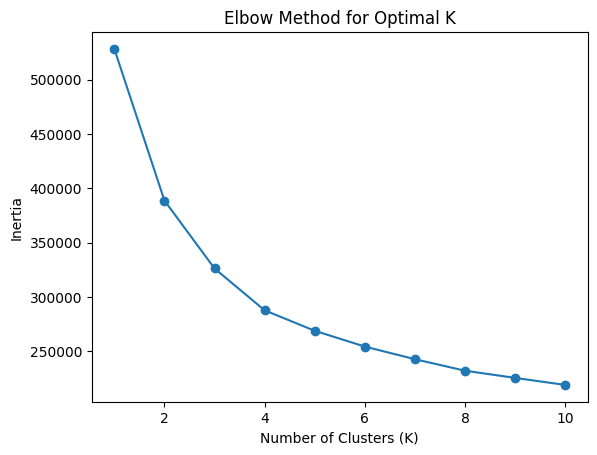

In [ ]:

plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

#### Step 8: Train the K-Means clustering model with the optimal number of clusters

In [ ]:

optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(X_train)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=42)

#### Step 9: Predict the clusters for the test data

In [ ]:
y_pred = kmeans.predict(X_test)

#### Step 10: Evaluate the clustering performance

##### Use Silhouette Score to measure the quality of clustering

In [ ]:
silhouette_avg = silhouette_score(X_test, y_pred)
print(f'Silhouette Score for {optimal_k} clusters: {silhouette_avg}')

Silhouette Score for 4 clusters: 0.19915590960826995


#### Step 11: Identify the cluster of a given data point (user input)

In [ ]:
# Step 11: Identify the cluster of a given data point (user input)
user_data_point = np.array([-70, -61, -66, -53, -51, -63, -82, -57, -76, -78, -66, -66, -61, -59, -73, -75, -63, -77])
user_data_point_scaled = scaler.transform(user_data_point.reshape(1, -1))
user_cluster = kmeans.predict(user_data_point_scaled)
print(f'The given data point belongs to Cluster {user_cluster[0]}')

The given data point belongs to Cluster 1


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:

user_data_point_input = input("Enter a data point (comma-separated values): ")
user_data_point = np.array([float(x) for x in user_data_point_input.split(',')])

# Ensure the input has the same number of features as the original data
if len(user_data_point) != X.shape[1]:
    print(f"Invalid input! Please provide {X.shape[1]} values.")
else:
    user_data_point_scaled = scaler.transform(user_data_point.reshape(1, -1))
    user_cluster = kmeans.predict(user_data_point_scaled)
    print(f'The given data point belongs to Cluster {user_cluster[0]}')

    # Optionally, provide an explanation for the cluster
    cluster_center_distances = np.linalg.norm(user_data_point_scaled - kmeans.cluster_centers_, axis=1)
    closest_cluster = np.argmin(cluster_center_distances)
    print(f'Reason: The given data point is closest to the center of Cluster {closest_cluster}')


Enter a data point (comma-separated values): -70, -61, -66, -53, -51, -63, -82, -57, -76, -78, -66, -66, -61, -59, -73, -75, -63, -77
The given data point belongs to Cluster 1
Reason: The given data point is closest to the center of Cluster 1


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


#### Step 12: Evaluate the clustering performance on the entire dataset
##### Use Silhouette Score to measure the quality of clustering

In [ ]:
all_data_scaled = scaler.transform(X)
all_clusters = kmeans.predict(all_data_scaled)
silhouette_avg_all = silhouette_score(all_data_scaled, all_clusters)
print(f'Silhouette Score for {optimal_k} clusters on the entire dataset: {silhouette_avg_all}')

Silhouette Score for 4 clusters on the entire dataset: 0.19711423678880197


#### Step 13: Visualize the clusters

##### Use PCA for dimensionality reduction and plot clusters in 2D

##### Fit PCA to the scaled data

In [ ]:
from sklearn.decomposition import PCA

# Fit PCA to the scaled data
pca = PCA(n_components=2)
X_pca = pca.fit_transform(all_data_scaled)

##### Plot the clusters in 2D

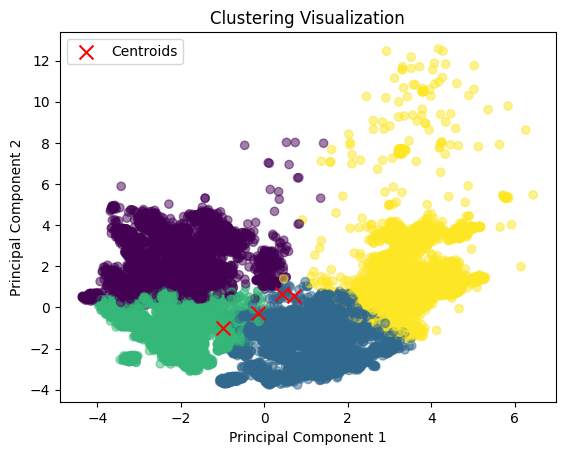

In [ ]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=all_clusters, cmap='viridis', alpha=0.5)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x', s=100, label='Centroids')
plt.title('Clustering Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

In [ ]:
### Create a Pickle file using serialization
import pickle
pickle_out = open("kmeans.pkl","wb")
pickle.dump(kmeans, pickle_out)
pickle_out.close()